# Центральная предельная теорема своими руками

Автор: <b>Вадим Уваров</b> <br>
Telegram: <b>@v_uvarov</b> <br>
E-mail: <b>uvarov.vadim42@gmail.com</b> <br>

Дисклеймер: На работе есть только Python 3.6, поэтому выполняю задание на нём.

## Бета-распределение случайной величины

Для данного задания было выбрано Бета-распределение, котороее имеет следующий вид.

Плотность распределения:
$f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}} {B(\alpha,\beta)}, \alpha > 0, \beta > 0\!$.

Использовались следующие параметры распределения: <br>
$\alpha = 0.5$ <br>
$\beta = 0.5$ <br>

Обозначим нашу случайную величину как $X$.


In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

# для воспроизводимости результатов
np.random.seed(42)

# Параметры распределения
alpha = 0.5
beta = 0.5

# теоретические характеристики случайной величины
mean, var = sp.stats.beta.stats(alpha, beta)
print('Теоретическое матожидание = ', mean)
print('Теоретическая дисперсия = ', var)

Теоретическое матожидание =  0.5
Теоретическая дисперсия =  0.125


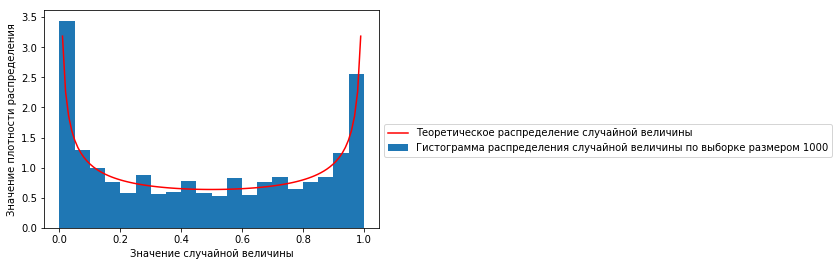

In [2]:
# Нарисуем теоретический график плотности распределения
# 100% значений случайной величины будут находиться в рэндже x
x = np.linspace(scipy.stats.beta.ppf(0.00, alpha, beta),
                scipy.stats.beta.ppf(1.0, alpha, beta), 100)
plt.plot(x, scipy.stats.beta.pdf(x, alpha, beta), 'r-', label='Теоретическое распределение случайной величины')

# Сгенерируем выборку по данному распределению и построим гистограмму
sample = scipy.stats.beta.rvs(alpha, beta, size=1000)
plt.hist(sample, bins=20, normed=True, label='Гистограмма распределения случайной величины по выборке размером 1000')
plt.legend(bbox_to_anchor=(1, 0.5), loc='upper left', ncol=1, frameon=True)
plt.xlabel('Значение случайной величины')
plt.ylabel('Значение плотности распределения')

# отрисуем графики
plt.show()

## Распределение выборочного среднего случайной величины, распределённой по Бета-распределению

Теоретические характеристики нашей случайной величины $X$, имеющей Бета-распределение: <br>

Матожидание: $\operatorname{E}[X] = \frac{\alpha}{\alpha+\beta}\!$. <br>
Дисперсия: $\operatorname{var}[X] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}\!$ <br>

Согласно центральной предельной теореме, выборочное среднее $MX_n$ выборки размера $n$ будет распределено следующим образом:

\begin{align}
\operatorname{E}[X_n] \sim N(\operatorname{E}[X], {\operatorname{var}[X] \over n})
\end{align}

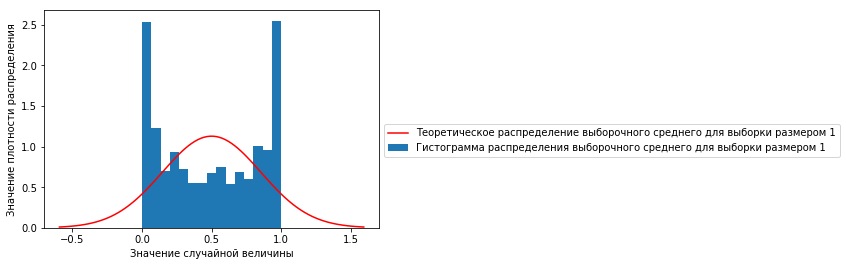

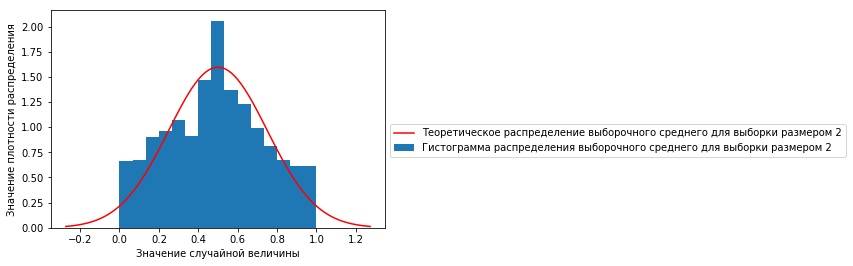

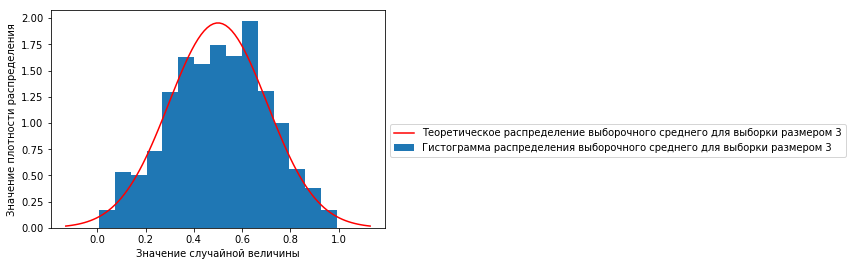

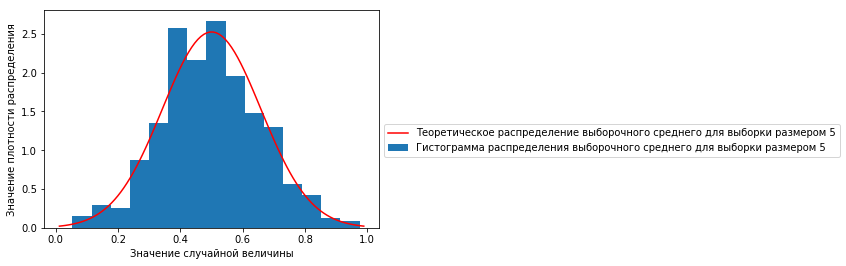

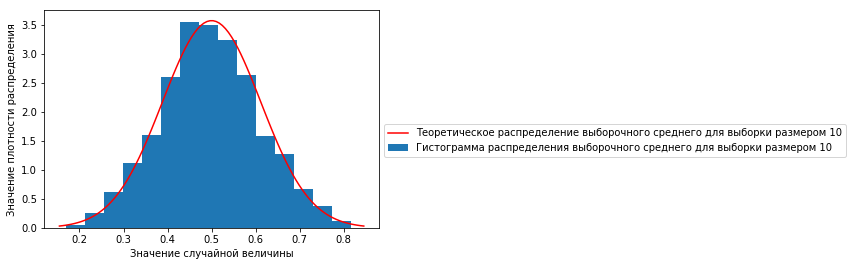

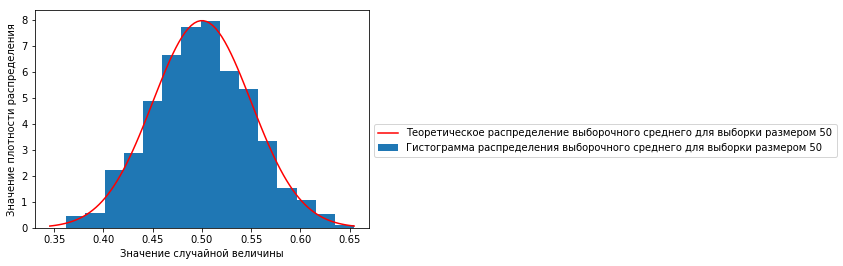

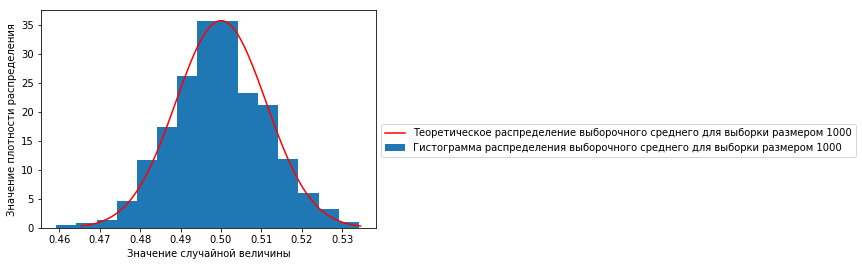

In [4]:
# для различных размеров выборок
for n in [1, 2, 3, 5, 10, 50, 1000]:
    # вычислим матожидание и дисперсию распределения выборочного среднего
    mean, var = sp.stats.beta.stats(alpha, beta)
    var /= n
    sd = np.sqrt(var)

    # нарисуем теоретическое распределение выборочного среднего
    x = np.linspace(scipy.stats.norm.ppf(0.001, mean, sd),
                    scipy.stats.norm.ppf(0.999, mean, sd), 100)
    plt.plot(x, scipy.stats.norm.pdf(x, mean, sd), 'r-', alpha=1.0,
             label='Теоретическое распределение выборочного среднего для выборки размером {}'.format(n))

    # построим выборку длиной 1000 из значений выборочного среднего
    sample_of_sample_means = np.empty(1000)
    for i in range(len(sample_of_sample_means)):
        # сгенерируем выборку из Бета-распределения длиной n
        beta_sample = scipy.stats.beta.rvs(alpha, beta, size=n)
        # рассчитаем выборочное среднее по выборке
        sample_mean = np.mean(beta_sample)
        # добавим выборочное среднее в выборку
        sample_of_sample_means[i] = sample_mean

    # построим гистограмму распределения выборочного среднего
    plt.hist(sample_of_sample_means, normed=True, bins=15,
             label='Гистограмма распределения выборочного среднего для выборки размером {}'.format(n))
    plt.legend(bbox_to_anchor=(1, 0.5), loc='upper left', ncol=1, frameon=True)
    plt.xlabel('Значение случайной величины')
    plt.ylabel('Значение плотности распределения')
    
    plt.show()

## Вывод
Убедились в том, что при увеличении размера выборки $n$ для случайной величины с матожиданием $\operatorname{E}[X]$ и дисперсией $\operatorname{D}[X]$, увеличивается точность аппроксимации распределения выборочного среднего по данной выборке нормальным распределением с параметрами $\operatorname{E}[X]$ и $\operatorname{D}[X] \over n$. То есть, убедились в справедливости центральной предельной теоремы.